<a href="https://colab.research.google.com/github/Schota/pytorch_learn/blob/main/pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.13
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.10.0.29.26
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.3.0
audioread          

In [252]:
import torch

In [253]:
import numpy as np
np1 = np.random.rand(3, 2)
np1

array([[0.76564795, 0.89010584],
       [0.18615054, 0.09044321],
       [0.66961485, 0.29888717]])

In [254]:
# @title
tensor = torch.randn(3, 4, 5)
tensor

tensor([[[ 1.0721,  0.2012, -0.2312,  0.2636, -1.2788],
         [-0.2328,  1.4138,  1.7734,  0.4399,  1.8625],
         [-0.3320, -0.5193,  0.7972, -0.3756,  2.3640],
         [-1.2940, -1.0662,  0.5852, -0.5435,  0.6477]],

        [[-0.5502, -0.0054,  0.3261,  1.3367,  1.5242],
         [ 1.8034,  0.4141, -1.1525,  0.2424,  0.6548],
         [-0.5814,  0.6023, -0.4338, -0.7285, -0.0653],
         [-0.8937, -0.0957,  0.6729,  1.4232,  0.9715]],

        [[ 0.7995,  0.5352,  0.7347, -1.7511, -1.4096],
         [-1.0563,  1.0304, -0.5340, -0.6519,  0.2650],
         [ 0.8387, -0.0744, -0.6878,  0.3305, -0.7757],
         [ 1.1362,  1.8566,  0.3304,  1.0363, -1.9956]]])

In [255]:
# @title
tensor_from = torch.tensor(np1)
tensor_from

tensor([[0.7656, 0.8901],
        [0.1862, 0.0904],
        [0.6696, 0.2989]], dtype=torch.float64)

In [256]:
# @title
tensor.dtype

torch.float32

In [257]:
# @title
my_torch = torch.arange(18)
my_torch

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [258]:
# @title
my_torch = my_torch.reshape(2, -1)
my_torch

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [259]:
# @title
my_torch = my_torch.view(3, -1)
my_torch

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [260]:
# @title
# with reshape and view, with change in original tensor, the subsequent tensor changes too
tens_1 = torch.arange(10)
tens_1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [261]:
# @title
tens_2 = tens_1.reshape(2, -1)
tens_2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [262]:
# @title
tens_1[2] = 1100
tens_1

tensor([   0,    1, 1100,    3,    4,    5,    6,    7,    8,    9])

In [263]:
# @title
tens_2

tensor([[   0,    1, 1100,    3,    4],
        [   5,    6,    7,    8,    9]])

In [264]:
# @title
my_torch[:, 3:6]

tensor([[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17]])

In [265]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [266]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [267]:
torch.manual_seed(39)

model = Model()

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [270]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [271]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

<ipython-input-271-65662100fb05>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [272]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [273]:
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [274]:
X = X.values
y = y.values

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [277]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [278]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [279]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [280]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.2522364854812622
Epoch: 10 and loss: 1.033829689025879
Epoch: 20 and loss: 0.7957368493080139
Epoch: 30 and loss: 0.5289579629898071
Epoch: 40 and loss: 0.3871704936027527
Epoch: 50 and loss: 0.2897043228149414
Epoch: 60 and loss: 0.20397862792015076
Epoch: 70 and loss: 0.14478372037410736
Epoch: 80 and loss: 0.11227520555257797
Epoch: 90 and loss: 0.09500415623188019


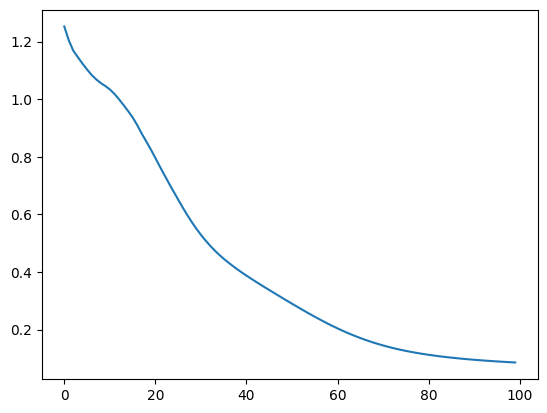

In [281]:
plt.plot(range(epochs), losses)

In [282]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [283]:
loss

tensor(0.0544)

In [284]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [286]:
my_model = Model()

my_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [287]:
my_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [288]:
with torch.no_grad():
  y_eval = my_model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(0.0544)